In [1]:
# Logistic Regression


In [2]:
import pandas as pd
# We load the data using pandas library. We considered only the following columns among the others
# as they can impact the rating of the Restaurent. 
fields = ['Country Code','Longitude','Latitude','Has Table booking','Has Online delivery','Price range','Average Cost for two','Rating text']
restaurant_data = pd.read_csv('input_data/zomato.csv', skipinitialspace=True, usecols=fields)## Load data
restaurant_data.head()

,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating text
0,162,121.027535,14.565443,1100,Yes,No,3,Excellent
1,162,121.014101,14.553708,1200,Yes,No,3,Excellent
2,162,121.056831,14.581404,4000,Yes,No,4,Very Good
3,162,121.056475,14.585318,1500,No,No,4,Excellent
4,162,121.057508,14.584450,1500,Yes,No,4,Excellent


In [3]:
restaurant_data.columns = restaurant_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
restaurant_data.head()

,country_code,longitude,latitude,average_cost_for_two,has_table_booking,has_online_delivery,price_range,rating_text
0,162,121.027535,14.565443,1100,Yes,No,3,Excellent
1,162,121.014101,14.553708,1200,Yes,No,3,Excellent
2,162,121.056831,14.581404,4000,Yes,No,4,Very Good
3,162,121.056475,14.585318,1500,No,No,4,Excellent
4,162,121.057508,14.584450,1500,Yes,No,4,Excellent


In [4]:
restaurant_data = restaurant_data[restaurant_data.rating_text.isin(['Excellent','Average'])]
restaurant_data.head()

,country_code,longitude,latitude,average_cost_for_two,has_table_booking,has_online_delivery,price_range,rating_text
0,162,121.027535,14.565443,1100,Yes,No,3,Excellent
1,162,121.014101,14.553708,1200,Yes,No,3,Excellent
3,162,121.056475,14.585318,1500,No,No,4,Excellent
4,162,121.057508,14.584450,1500,Yes,No,4,Excellent
8,162,120.980090,14.552990,6000,Yes,No,4,Excellent


In [5]:
# Formatting Text data
restaurant_data = restaurant_data.replace(['Yes', 'No', 'Excellent', 'Average'],[1, 0, 1, 0]) 
restaurant_data.head()

,country_code,longitude,latitude,average_cost_for_two,has_table_booking,has_online_delivery,price_range,rating_text
0,162,121.027535,14.565443,1100,1,0,3,1
1,162,121.014101,14.553708,1200,1,0,3,1
3,162,121.056475,14.585318,1500,0,0,4,1
4,162,121.057508,14.584450,1500,1,0,4,1
8,162,120.980090,14.552990,6000,1,0,4,1


In [6]:
import seaborn as sns # package for visualization (more on seaborn later)
# Data Analysis , Pairplot to see how data is distrubuted or organized.
g = sns.pairplot(restaurant_data)

In [7]:
Y = {}
Y = restaurant_data["rating_text"].values
restaurant_data = restaurant_data.drop(['rating_text'],axis=1)
X = restaurant_data.values.tolist()

In [13]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import numpy as np
# Shuffling the data for better results.
X, Y = shuffle(X,Y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [9]:
# Logistic Regression Model Fitting

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9542079207920792


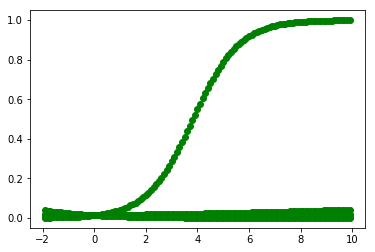

In [10]:
# Plotting sigmoid function 
import numpy as np
from matplotlib import pyplot as plt
def model(clf,x_train):
    return 1/(1 + np.exp(-(clf.intercept_+clf.coef_*x_train)))
for i in range(1,120,1):
    plt.plot(i/10.0-2,model(clf,i/10.0-2),'ro',color='green')

In [12]:
# The confusion matrix  result which is telling us correct predictions and incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[729   8]
 [ 29  42]]
